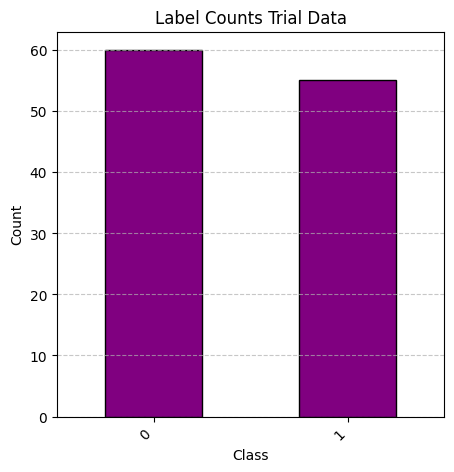

In [2]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


metadata = pd.read_csv("/content/drive/MyDrive/deceptive-16khz/metadata.csv")
class_counts = metadata['label'].value_counts()

plt.figure(figsize=(5,5))
class_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Label Counts Trial Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


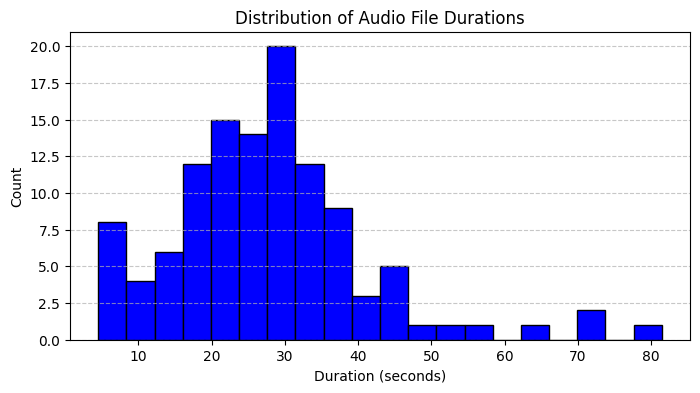

In [3]:
audio_folder = '/content/drive/MyDrive/deceptive-16khz'
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

durations = []
for file in audio_files:
  file_path = os.path.join(audio_folder, file)
  audio, sr = librosa.load(file_path, sr=None)
  duration = librosa.get_duration(y = audio, sr = sr)
  durations.append(duration)

plt.figure(figsize=(8, 4))
plt.hist(durations, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

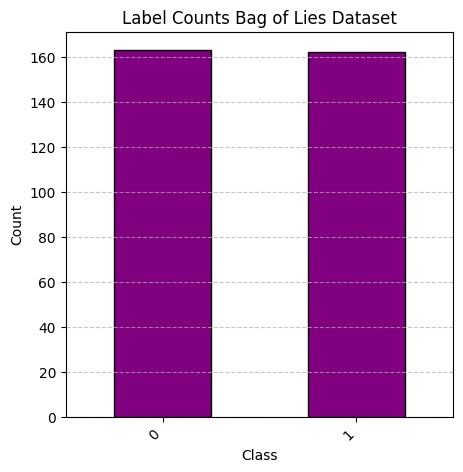

In [5]:
metadata = pd.read_csv("/content/drive/MyDrive/bag-of-lies/BagOfLies/Audio/metadata.csv")
class_counts = metadata['label'].value_counts()

plt.figure(figsize=(5,5))
class_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Label Counts Bag of Lies Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

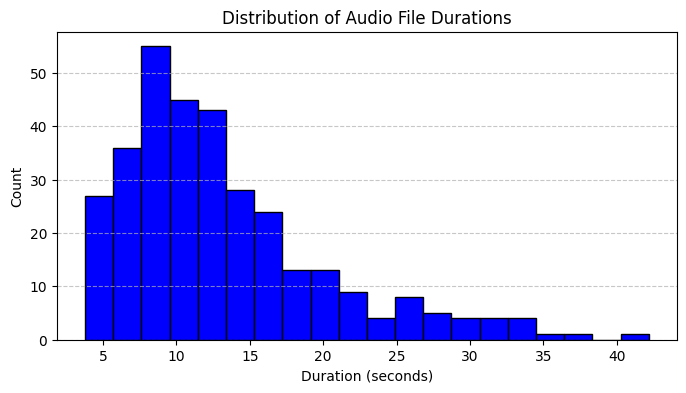

In [6]:
audio_folder = '/content/drive/MyDrive/bag-of-lies/BagOfLies/Audio'
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

durations = []
for file in audio_files:
  file_path = os.path.join(audio_folder, file)
  audio, sr = librosa.load(file_path, sr=None)
  duration = librosa.get_duration(y = audio, sr = sr)
  durations.append(duration)

plt.figure(figsize=(8, 4))
plt.hist(durations, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
pip install audio-denoiser --quiet

In [35]:
from audio_denoiser.AudioDenoiser import AudioDenoiser

denoiser = AudioDenoiser()
in_audio_file = '/content/drive/MyDrive/bag-of-lies/BagOfLies/Audio/run_0_User_2.wav'
out_audio_file = '/content/drive/MyDrive/bag-of-lies/BagOfLies/Audio/run_0_User_2_clean.wav'
denoiser.process_audio_file(in_audio_file, out_audio_file)

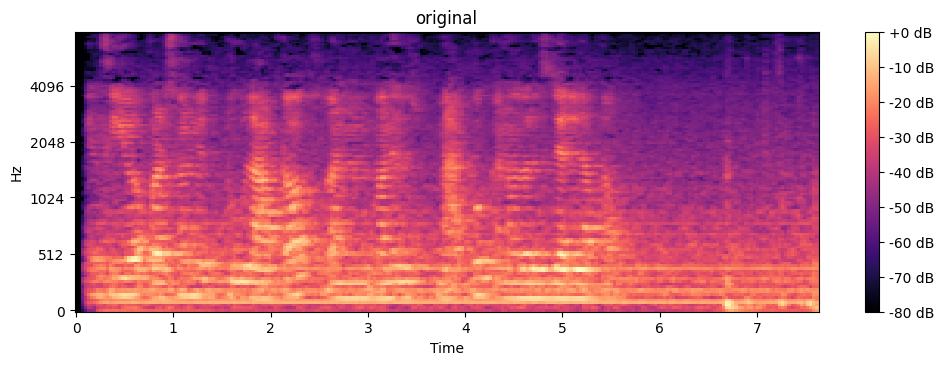

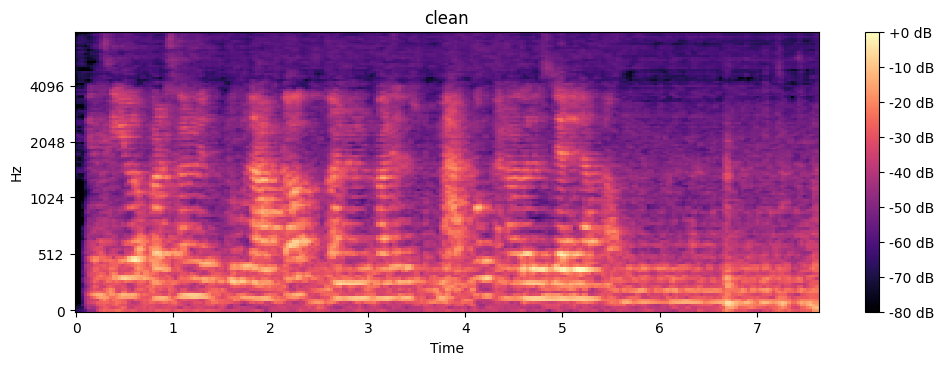

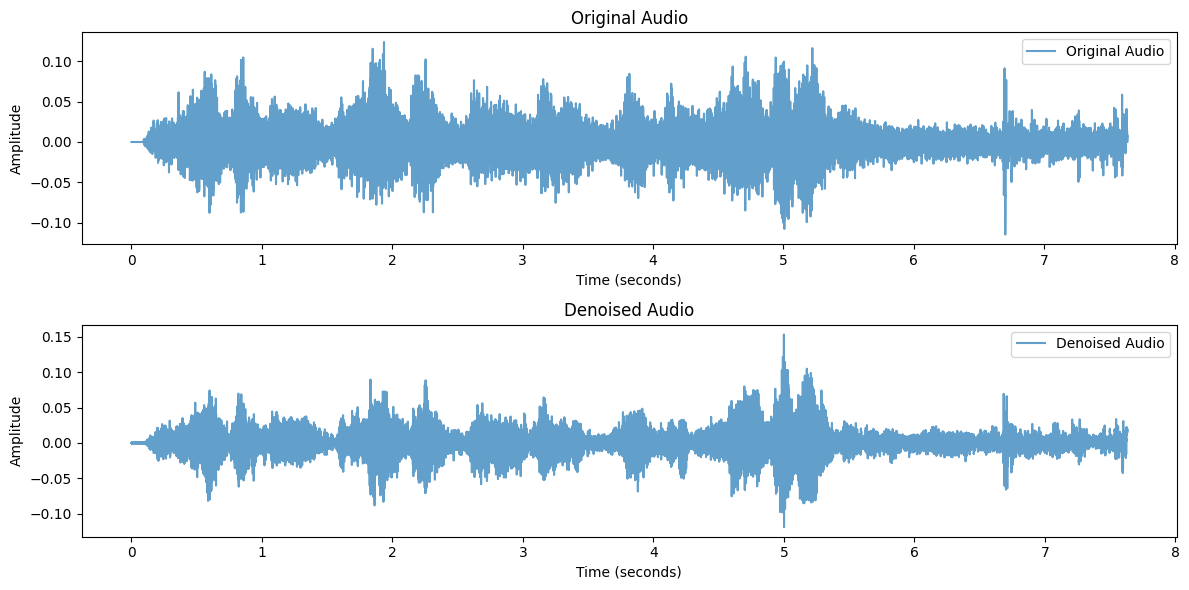

In [36]:
import librosa
file_path = '/content/drive/MyDrive/bag-of-lies/BagOfLies/Audio/run_0_User_2.wav'
y1, sr = librosa.load(file_path, sr=16000)

spectrogram1 = librosa.feature.melspectrogram(y=y1, sr=sr)
spectrogram_db1 = librosa.power_to_db(spectrogram1, ref=np.max)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(spectrogram_db1, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f'original')

file_path1 = '/content/drive/MyDrive/bag-of-lies/BagOfLies/Audio/run_0_User_2_clean.wav'
y2, sr = librosa.load(file_path1, sr=16000)

spectrogram2 = librosa.feature.melspectrogram(y=y2, sr=sr)
spectrogram_db2 = librosa.power_to_db(spectrogram2, ref=np.max)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
librosa.display.specshow(spectrogram_db2, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f'clean')


#### plot in the time domain
#time vector
time_vector = np.arange(0, len(y1) / sr, 1/sr)
time_vector2 = np.arange(0, len(y2) / sr, 1/sr)


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_vector, y1, label='Original Audio', alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Audio')
plt.legend()

# Plot the denoised audio
plt.subplot(2, 1, 2)
plt.plot(time_vector2, y2, label='Denoised Audio', alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Denoised Audio')
plt.legend()

plt.tight_layout()
plt.show()